In [3]:
# -----------------------------------------------------------------------------
# :author:    Juanjuan Huang & Shelly D. Keylly
# :email:     juanjuan.huang@anl.gov
# :copyright: Copyright © 2023, UChicago Argonne, LLC
# -----------------------------------------------------------------------------

## Imports

In [2]:
# %matplotlib widget
import neighbor_core as nc
from neighbor_core import ClusterNeighbor
from ipyfilechooser import FileChooser
import numpy as np

# Example 1, basic functionality go through

## Initialize a cluster and view it

In [4]:
fc = FileChooser()
display(fc)

FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

## view it

In [5]:
cluster = ClusterNeighbor()
if fc.value is not None:
    cluster.load_xyz(path=fc.value)
else:
    cluster.load_xyz(path="structure_examples/198087-ICSD molecule.xyz")
cluster.view_xyz(label=True, show_symbol=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Plot histogram

In [6]:
cluster.get_pairs()
cluster.plot_hist(plot_engine="plotly")

## Get CN reports and save to excel

In [7]:
cluster.get_CN_summary_all(tolerance=0.1, bond_range=5, printit=False)
cluster.print_CN_summary()
cluster.write_to_excel("20240806_test_original.xlsx")

Bond Type: Pb-O
-- Distance: 2.164006661818935
-- Average CN: 5.2
-- Info: 
4 atoms have CN of 3; 
11 atoms have CN of 6; 
-- Tolerance: 0.1 

-- Distance: 3.759464103600722
-- Average CN: 2.4
-- Info: 
12 atoms have CN of 2; 
3 atoms have CN of 4; 
-- Tolerance: 0.1 

-- Distance: 4.0161487745681885
-- Average CN: 2.4
-- Info: 
10 atoms have CN of 2; 
4 atoms have CN of 3; 
1 atoms have CN of 4; 
-- Tolerance: 0.1 

-- Distance: 4.450974934970656
-- Average CN: 4.266666666666667
-- Info: 
14 atoms have CN of 4; 
1 atoms have CN of 8; 
-- Tolerance: 0.1 

-- Distance: 4.861048023898767
-- Average CN: 0.9333333333333333
-- Info: 
4 atoms have CN of 0; 
8 atoms have CN of 1; 
3 atoms have CN of 2; 
-- Tolerance: 0.1 

Bond Type: O-O
-- Distance: 2.707596806026806
-- Average CN: 0.7272727272727273
-- Info: 
12 atoms have CN of 0; 
32 atoms have CN of 1; 
-- Tolerance: 0.1 

-- Distance: 3.056656193800888
-- Average CN: 5.090909090909091
-- Info: 
4 atoms have CN of 2; 
18 atoms have CN of

## remove undercoordinated atoms

In [8]:
cluster.remove_under_coordinated_atoms(center_atom="Pb", CN_atom="O", CN_threshold=4, bond_range=3, self_apply=True)
cluster.view_xyz(label=False, show_symbol=False)

Remove under-coordinated atoms: Atoms(symbols='Pb4', pbc=False)[[22, 37, 57, 58]]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [9]:
cluster.get_CN_summary_all(tolerance=0.1, bond_range=5, printit=False)
cluster.print_CN_summary()
cluster.write_to_excel("20240807_test_reduced.xlsx")

Bond Type: Pb-O
-- Distance: 2.164006684677769
-- Average CN: 6.0
-- Info: 
11 atoms have CN of 6; 
-- Tolerance: 0.1 

-- Distance: 3.7594640623910167
-- Average CN: 2.5454545454545454
-- Info: 
8 atoms have CN of 2; 
3 atoms have CN of 4; 
-- Tolerance: 0.1 

-- Distance: 4.016148722271057
-- Average CN: 2.5454545454545454
-- Info: 
6 atoms have CN of 2; 
4 atoms have CN of 3; 
1 atoms have CN of 4; 
-- Tolerance: 0.1 

-- Distance: 4.450974886404176
-- Average CN: 4.363636363636363
-- Info: 
10 atoms have CN of 4; 
1 atoms have CN of 8; 
-- Tolerance: 0.1 

-- Distance: 4.861047941704461
-- Average CN: 0.9090909090909091
-- Info: 
4 atoms have CN of 0; 
4 atoms have CN of 1; 
3 atoms have CN of 2; 
-- Tolerance: 0.1 

Bond Type: O-O
-- Distance: 2.707596806026806
-- Average CN: 0.7272727272727273
-- Info: 
12 atoms have CN of 0; 
32 atoms have CN of 1; 
-- Tolerance: 0.1 

-- Distance: 3.056656193800888
-- Average CN: 5.090909090909091
-- Info: 
4 atoms have CN of 2; 
18 atoms have 

# Example 2: Polynomial fits of different shells

## select a cif file

In [10]:
fc = FileChooser()
display(fc)

FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

In [11]:
cif_cluster = ClusterNeighbor()
if fc.value is not None:
    cif_cluster.load_xyz(path=fc.value)
else:
   cif_cluster.load_xyz(path="test_Pt/Ptfoil_243678.cif")
cif_cluster.view_xyz(label=True, show_symbol=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [12]:
cif_cluster.get_CN_all(tolerance=0.1, bond_range=10, printit=True)

Pt-Pt
1 length: 2.774  CN: 1968.000


## For multiple shells with undercoordinated atoms removed

In [14]:
center_atom = "Pt"
CN_atom = "Pt"
CN_bond_range = 6
tolerance = 0.1
undercoordinated_threshold = 4

# Initialize dictionaries to store results
CNs_all = {}
bondlengths_all = {}
num_atoms_all = {}
sizes_all = {}

sizes = np.hstack([np.arange(5, 20, 2), np.arange(20, 90, 10)])
sizes = np.hstack([np.arange(5, 20, 5), np.arange(20, 40, 10)])

for i in sizes:
    expanded_cluster = cif_cluster.expand_to_sphere(target_diameter=i, self_apply=False)
    new_cluster = ClusterNeighbor()
    new_cluster.load_xyz(from_file=False, atom_object=expanded_cluster)
    num_atoms = len(new_cluster.atoms)
    new_cluster.atoms.set_pbc(False)

    if 4 < num_atoms < 100:
        new_cluster.remove_under_coordinated_atoms(center_atom=center_atom, 
                                                   CN_atom=CN_atom, 
                                                   CN_threshold=undercoordinated_threshold, 
                                                   bond_range=5, 
                                                   self_apply=True)
    
    new_cluster.get_CN_summary_all(tolerance=tolerance, 
                                   bond_range=CN_bond_range, 
                                   printit=False)
    
    # Get bond lengths for each shell
    bond_lengths = list(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'].keys())
    new_cluster.write_to_excel(f"size_{new_cluster.get_cluster_size():.2f}A")
    # new_cluster.print_CN_summary()
    for shell_index, bond_length in enumerate(bond_lengths):
        shell_key = f'shell_{shell_index + 1}'
        
        # Ensure the key exists in each dictionary
        if shell_key not in CNs_all:
            CNs_all[shell_key] = []
            bondlengths_all[shell_key] = []
            num_atoms_all[shell_key] = []
            sizes_all[shell_key] = []
        
        # Append data to the relevant shell
        bondlengths_all[shell_key].append(bond_length)
        CNs_all[shell_key].append(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'][bond_length]['average_CN'])
        sizes_all[shell_key].append(new_cluster.get_cluster_size())
        num_atoms_all[shell_key].append(num_atoms)
    
    print(f"Processed size: {new_cluster.get_cluster_size()} A with {len(bond_lengths)} shells")
    # print(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'])
    # new_cluster.view_xyz(label=False)


Processed size: 2.774093039679816 A with 1 shells
No under-coordinated atoms found.
Processed size: 8.322279119039449 A with 4 shells
Processed size: 13.870465198399081 A with 4 shells
Processed size: 19.418651277758716 A with 4 shells
Processed size: 29.489013509888732 A with 4 shells


In [15]:
new_cluster.write_to_excel('Pt_foil_summary.xlsx')

In [16]:
new_cluster.CN_summary['Pt-Pt']

defaultdict(dict,
            {2.7740930396798165: {'average_CN': 10.344827586206897,
              'info': '12 atoms have CN of 5; \n72 atoms have CN of 6; \n96 atoms have CN of 7; \n36 atoms have CN of 8; \n84 atoms have CN of 9; \n48 atoms have CN of 10; \n48 atoms have CN of 11; \n532 atoms have CN of 12; ',
              'tolerance': 0.1},
             3.923160000000001: {'average_CN': 4.836206896551724,
              'info': '12 atoms have CN of 1; \n204 atoms have CN of 3; \n120 atoms have CN of 4; \n168 atoms have CN of 5; \n424 atoms have CN of 6; ',
              'tolerance': 0.1},
             4.804870089648627: {'average_CN': 18.232758620689655,
              'info': '24 atoms have CN of 9; \n36 atoms have CN of 10; \n24 atoms have CN of 11; \n72 atoms have CN of 12; \n120 atoms have CN of 13; \n24 atoms have CN of 14; \n36 atoms have CN of 15; \n48 atoms have CN of 16; \n48 atoms have CN of 17; \n36 atoms have CN of 18; \n36 atoms have CN of 19; \n24 atoms have CN of 20; \

## Polynomial fitting

  Coefficient         Value
0    Constant -5.197220e-02
1         x^1  1.245139e+00
2         x^2 -5.250417e-02
3         x^3 -2.041824e-05
4         x^4  3.781282e-05
5         x^5  6.270694e-07
6         x^6 -3.454637e-08
--------------------
N1=-0.051972199721006+1.245139258132046*d-0.052504170779056*d^2-0.000020418244302*d^3+0.000037812823404*d^4+0.000000627069449*d^5-0.000000034546368*d^6


  Coefficient         Value
0    Constant  1.316921e+00
1         x^1  1.374070e-01
2         x^2  1.908829e-03
3         x^3 -2.260312e-05
4         x^4 -1.486270e-06
5         x^5 -2.903011e-08
6         x^6  2.407113e-10
--------------------
N2=1.316920520643886+0.137406954982924*d+0.001908829105841*d^2-0.000022603119786*d^3-0.000001486270026*d^4-0.000000029030110*d^5+0.000000000240711*d^6


  Coefficient         Value
0    Constant -3.855372e+00
1         x^1  1.311017e+00
2         x^2  5.707612e-03
3         x^3 -8.350293e-04
4         x^4 -2.505921e-05
5         x^5 -5.012888e-08
6      

/Users/juanjuanhuang/Desktop/neighbor/neighbor_core.py:105: RankWarning:

Polyfit may be poorly conditioned

/Users/juanjuanhuang/Desktop/neighbor/neighbor_core.py:105: RankWarning:

Polyfit may be poorly conditioned

/Users/juanjuanhuang/Desktop/neighbor/neighbor_core.py:105: RankWarning:

Polyfit may be poorly conditioned

/Users/juanjuanhuang/Desktop/neighbor/neighbor_core.py:105: RankWarning:

Polyfit may be poorly conditioned

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_12461/492114575.py:14: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x112454910> starts with '_'. It is thus excluded from the legend.

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_12461/492114575.py:14: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x112455de0> starts with '_'. It is thus excluded from the legend.

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_12461/492114575.py:14: UserWa

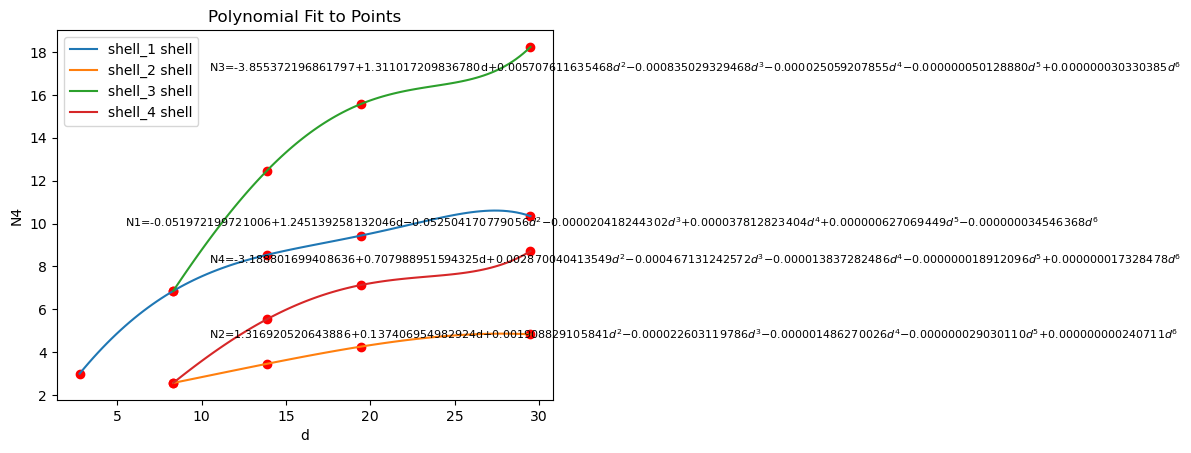

In [17]:
from neighbor_core import fit_polynomial
import matplotlib.pyplot as plt

degree = 6

plt.figure()
for i in range(1, 5):
    shell = f'shell_{i}'
    polynomial = fit_polynomial(np.array(sizes_all[shell]), 
                                np.array(CNs_all[shell]), 
                                degree=degree, new_figure=False, xlabel="d", ylabel=f"N{i}", )

legend_labels = sum([[ '_nolegend', f'{shell} shell'] for shell in CNs_all.keys()], [])
plt.legend(legend_labels)

## Fitting using Michaelis Menten

In [19]:
from neighbor_core import fit_michaelis_menten

  Coefficient     Value
0           α  2.657785
1           β  0.183190
2           C -1.890570
--------------------
N1 = (2.65778 * d) / (1 + 0.18319 * d) + -1.89057


  Coefficient     Value
0           α  0.709455
1           β  0.091229
2           C -0.802485
--------------------
N2 = (0.70945 * d) / (1 + 0.09123 * d) + -0.80249


  Coefficient      Value
0           α  17.257924
1           β   0.286467
2           C -35.596986
--------------------
N3 = (17.25792 * d) / (1 + 0.28647 * d) + -35.59699


  Coefficient      Value
0           α   5.820355
1           β   0.212096
2           C -14.945644
--------------------
N4 = (5.82036 * d) / (1 + 0.21210 * d) + -14.94564




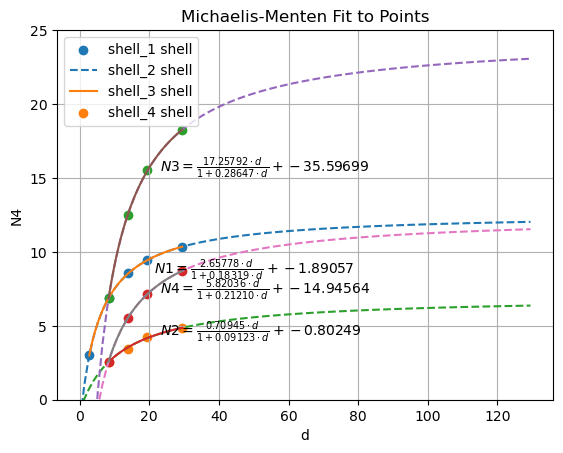

In [20]:
plt.figure()

# Loop through each shell and fit the Michaelis-Menten function
for i in range(1, 5):
    shell = f'shell_{i}'
    fit = fit_michaelis_menten(
        np.array(sizes_all[shell]), 
        np.array(CNs_all[shell]), 
        new_figure=False, 
        xlabel="d", 
        ylabel=f"N{i}"
    )

# Create the legend labels
legend_labels = [f'{shell} shell' for shell in CNs_all.keys()]

# Add the legend with appropriate labels
plt.legend(legend_labels)
plt.ylim(0, 25)

plt.show()

# TODO

1. Adding the bulk CN constraints into the fittings

# Example 3: Shrinking Pt xyz file

In [21]:
fc = FileChooser()
display(fc)

FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

In [22]:
cif_cluster = ClusterNeighbor()
if fc.value is not None:
    cif_cluster.load_xyz(path=fc.value)
else:
   cif_cluster.load_xyz(path="test_Pt/Pt_foil_2d_xyz.xyz")
   
cif_cluster.view_xyz(label=False, show_symbol=False)
cif_cluster.get_cluster_size()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

166.49181084505508

In [23]:
center_atom = "Pt"
CN_atom = "Pt"
CN_bond_range = 6
tolerance = 0.1

# Initialize dictionaries to store results
CNs_all = {}
bondlengths_all = {}
num_atoms_all = {}
sizes_all = {}

sizes = np.arange(5, 120, 10)/2 # radius

for size_i in sizes[::-1]:
    cif_cluster.shrink_cluster_size(new_radius=size_i, self_apply=True)
    
    num_atoms = len(cif_cluster.atoms)
    cif_cluster.atoms.set_pbc(False)    
    cif_cluster.get_CN_summary_all(tolerance=tolerance, 
                                   bond_range=CN_bond_range, 
                                   printit=False)
    
    # Get bond lengths for each shell
    bond_lengths = list(cif_cluster.CN_summary[f'{center_atom}-{CN_atom}'].keys())
    cif_cluster.write_to_excel(f"size_{cif_cluster.get_cluster_size():.2f}A")
    # cif_cluster.print_CN_summary()
    for shell_index, bond_length in enumerate(bond_lengths):
        shell_key = f'shell_{shell_index + 1}'
        
        # Ensure the key exists in each dictionary
        if shell_key not in CNs_all:
            CNs_all[shell_key] = []
            bondlengths_all[shell_key] = []
            num_atoms_all[shell_key] = []
            sizes_all[shell_key] = []
        
        # Append data to the relevant shell
        bondlengths_all[shell_key].append(bond_length)
        CNs_all[shell_key].append(cif_cluster.CN_summary[f'{center_atom}-{CN_atom}'][bond_length]['average_CN'])
        sizes_all[shell_key].append(cif_cluster.get_cluster_size())
        num_atoms_all[shell_key].append(num_atoms)
    
    print(f"Processed size: {cif_cluster.get_cluster_size()} A with {len(bond_lengths)} shells")
    # print(cif_cluster.CN_summary[f'{center_atom}-{CN_atom}'])
    cif_cluster.view_xyz(label=False)


Processed size: 114.84879197649056 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 104.75645310401072 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 94.88858132344482 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 84.9615529333498 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 74.95186655943934 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 64.82124140487284 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 54.78394797011256 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 44.90261857078717 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 33.975562231109585 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 23.86365064836476 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 14.145154541849308 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 3.92316 A with 2 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### polynomial fit

  Coefficient      Value
0           α  24.192826
1           β   0.958138
2           C -15.940896
--------------------
N1 = (24.19283 * d) / (1 + 0.95814 * d) + -15.94090


  Coefficient     Value
0           α  6.218553
1           β  0.541367
2           C -6.809248
--------------------
N2 = (6.21855 * d) / (1 + 0.54137 * d) + -6.80925




RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

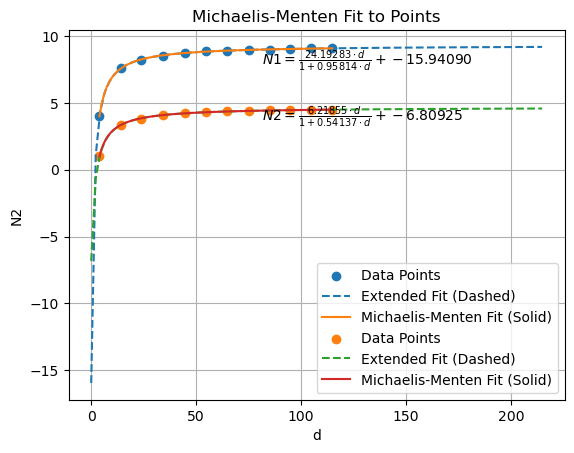

In [24]:
plt.figure()

# Loop through each shell and fit the Michaelis-Menten function
for i in range(1, 5):
    shell = f'shell_{i}'
    fit = fit_michaelis_menten(
        np.array(sizes_all[shell]), 
        np.array(CNs_all[shell]), 
        new_figure=False, 
        xlabel="d", 
        ylabel=f"N{i}"
    )

# Create the legend labels
legend_labels = [f'{shell} shell' for shell in CNs_all.keys()]

# Add the legend with appropriate labels
plt.legend(legend_labels)
plt.ylim(0, 25)

plt.show()

  Coefficient         Value
0    Constant  1.974417e+00
1         x^1  6.224028e-01
2         x^2 -2.198194e-02
3         x^3  3.653363e-04
4         x^4 -2.838567e-06
5         x^5  8.310774e-09
--------------------
N0=1.974417269997866+0.622402772341716*d-0.021981942013173*d^2+0.000365336285635*d^3-0.000002838566802*d^4+0.000000008310774*d^5


  Coefficient         Value
0    Constant -3.245169e-01
1         x^1  4.022543e-01
2         x^2 -1.378039e-02
3         x^3  2.244866e-04
4         x^4 -1.719982e-06
5         x^5  4.984059e-09
--------------------
N1=-0.324516919115215+0.402254301513789*d-0.013780387487665*d^2+0.000224486649734*d^3-0.000001719981860*d^4+0.000000004984059*d^5


  Coefficient         Value
0    Constant  3.326463e+00
1         x^1  5.578318e-01
2         x^2 -1.500207e-02
3         x^3  2.071547e-04
4         x^4 -1.411146e-06
5         x^5  3.750379e-09
--------------------
N2=3.326462885698540+0.557831802201305*d-0.015002072624636*d^2+0.000207154718761*d^3-0

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_75923/3210426337.py:13: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x1686ba0e0> starts with '_'. It is thus excluded from the legend.

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_75923/3210426337.py:13: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x16867ca30> starts with '_'. It is thus excluded from the legend.

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_75923/3210426337.py:13: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x168673610> starts with '_'. It is thus excluded from the legend.

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_75923/3210426337.py:13: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x1686d7ee0> starts with '_'. It is thus excluded from the legend.



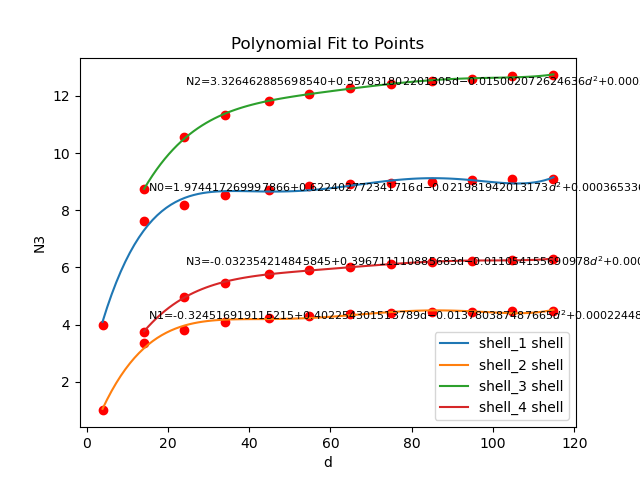

In [132]:
from neighbor_core import fit_polynomial
import matplotlib.pyplot as plt

degree = 5

plt.figure()
for i, shell_i in enumerate(sizes_all.keys()):
    polynomial = fit_polynomial(np.array(sizes_all[shell_i]), 
                                np.array(CNs_all[shell_i]), 
                                degree=degree, new_figure=False, xlabel="d", ylabel=f"N{i}", )

legend_labels = sum([[ '_nolegend', f'{shell_i} shell'] for shell_i in CNs_all.keys()], [])
plt.legend(legend_labels);

# Example 4: Polynomial fits of 2D oxide expanding

## Select a file

In [19]:
fc = FileChooser()
display(fc)

FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

## View the CIF file

In [20]:
cif_cluster = ClusterNeighbor()
if fc.value is not None:
    cif_cluster.load_xyz(path=fc.value)
else:
   cif_cluster.load_xyz(path="structure_examples/PtO2.cif")
   
cif_cluster.view_xyz(label=True, show_symbol=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### expand it

In [21]:
replication_factor = [10, 10, 1]

expanded = ClusterNeighbor()
expanded.load_xyz(from_file=False, atom_object=cif_cluster.expand_cif(replication_factors=replication_factor, self_apply=False))
expanded.view_xyz(label=False, show_symbol=False)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### shift the cell and expand again

In [22]:
shifted_positions = cif_cluster.atoms.get_scaled_positions() +0.3
cif_cluster.atoms.set_scaled_positions(shifted_positions)
cif_cluster.refresh_atoms()
cif_cluster.view_xyz(label=True, show_symbol=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [23]:
replication_factor =[10, 10, 1]

expanded = ClusterNeighbor()
expanded.load_xyz(from_file=False, atom_object=cif_cluster.expand_cif(replication_factors=[10, 10, 1], self_apply=False))
expanded.view_xyz(label=False, show_symbol=False)

# expanded.get_CN_summary_all(tolerance=0.05, bond_range=5, printit=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Calculation loops

In [24]:
center_atom = "Pt"
CN_atom = "O"
CN_bond_range = 4
tolerance = 0.1
undercoordinated_threshold = 6

# Initialize dictionaries to store results
CNs_all = {}
bondlengths_all = {}
num_atoms_all = {}
sizes_all = {}

replication_list = [[i, i, 1] for i in range(2, 11)]  # Generates rows [1,1,1] to [10,10,1]

for replication_factor_i in replication_list:
    expanded_cluster = cif_cluster.expand_cif(replication_factors=replication_factor_i, self_apply=False)
    new_cluster = ClusterNeighbor()
    new_cluster.load_xyz(from_file=False, atom_object=expanded_cluster)
    new_cluster.view_xyz(label=False)

    num_atoms = len(new_cluster.atoms)
    new_cluster.atoms.set_pbc(False)
    new_cluster.get_CN_summary_all(tolerance=tolerance, 
                                   bond_range=CN_bond_range, 
                                   printit=False)
    
    # Get bond lengths for each shell
    bond_lengths = list(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'].keys())
    new_cluster.write_to_excel(f"size_{new_cluster.get_cluster_size():.2f}A")
    # new_cluster.print_CN_summary()
    for shell_index, bond_length in enumerate(bond_lengths):
        shell_key = f'shell_{shell_index + 1}'
        
        # Ensure the key exists in each dictionary
        if shell_key not in CNs_all:
            CNs_all[shell_key] = []
            bondlengths_all[shell_key] = []
            num_atoms_all[shell_key] = []
            sizes_all[shell_key] = []
        
        # Append data to the relevant shell
        bondlengths_all[shell_key].append(bond_length)
        CNs_all[shell_key].append(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'][bond_length]['average_CN'])
        sizes_all[shell_key].append(new_cluster.get_cluster_size())
        num_atoms_all[shell_key].append(num_atoms)

    print(f"Processed size: {new_cluster.get_cluster_size()} A with {len(bond_lengths)} shells")
    print(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'])


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 10.047597679339162 A with 3 shells
defaultdict(<class 'dict'>, {2.0363399403795426: {'average_CN': 2.875, 'info': '1 atoms have CN of 1; \n3 atoms have CN of 2; \n2 atoms have CN of 3; \n2 atoms have CN of 5; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '4 atoms have CN of 0; \n4 atoms have CN of 1; ', 'tolerance': 0.1}, 3.7792168622758076: {'average_CN': 3.0, 'info': '1 atoms have CN of 1; \n2 atoms have CN of 2; \n2 atoms have CN of 3; \n2 atoms have CN of 4; \n1 atoms have CN of 5; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 14.10716465258788 A with 3 shells
defaultdict(<class 'dict'>, {2.0363410548067638: {'average_CN': 3.388888888888889, 'info': '1 atoms have CN of 1; \n5 atoms have CN of 2; \n6 atoms have CN of 3; \n4 atoms have CN of 5; \n2 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '9 atoms have CN of 0; \n9 atoms have CN of 1; ', 'tolerance': 0.1}, 3.7729428784593093: {'average_CN': 4.222222222222222, 'info': '1 atoms have CN of 1; \n3 atoms have CN of 2; \n2 atoms have CN of 3; \n5 atoms have CN of 4; \n3 atoms have CN of 5; \n2 atoms have CN of 6; \n2 atoms have CN of 8; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 18.86543651953319 A with 3 shells
defaultdict(<class 'dict'>, {2.03634179966326: {'average_CN': 3.65625, 'info': '1 atoms have CN of 1; \n7 atoms have CN of 2; \n12 atoms have CN of 3; \n6 atoms have CN of 5; \n6 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '16 atoms have CN of 0; \n16 atoms have CN of 1; ', 'tolerance': 0.1}, 3.770560267838251: {'average_CN': 4.9375, 'info': '1 atoms have CN of 1; \n4 atoms have CN of 2; \n2 atoms have CN of 3; \n8 atoms have CN of 4; \n5 atoms have CN of 5; \n6 atoms have CN of 6; \n4 atoms have CN of 8; \n2 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 23.90882725559321 A with 3 shells
defaultdict(<class 'dict'>, {2.0363422894287755: {'average_CN': 3.82, 'info': '1 atoms have CN of 1; \n9 atoms have CN of 2; \n20 atoms have CN of 3; \n8 atoms have CN of 5; \n12 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '25 atoms have CN of 0; \n25 atoms have CN of 1; ', 'tolerance': 0.1}, 3.76931776059714: {'average_CN': 5.4, 'info': '1 atoms have CN of 1; \n5 atoms have CN of 2; \n2 atoms have CN of 3; \n11 atoms have CN of 4; \n7 atoms have CN of 5; \n12 atoms have CN of 6; \n6 atoms have CN of 8; \n6 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 29.243445613524212 A with 3 shells
defaultdict(<class 'dict'>, {2.0363426307565256: {'average_CN': 3.9305555555555554, 'info': '1 atoms have CN of 1; \n11 atoms have CN of 2; \n30 atoms have CN of 3; \n10 atoms have CN of 5; \n20 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '36 atoms have CN of 0; \n36 atoms have CN of 1; ', 'tolerance': 0.1}, 3.7685569851729617: {'average_CN': 5.722222222222222, 'info': '1 atoms have CN of 1; \n6 atoms have CN of 2; \n2 atoms have CN of 3; \n14 atoms have CN of 4; \n9 atoms have CN of 5; \n20 atoms have CN of 6; \n8 atoms have CN of 8; \n12 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 34.61764975696029 A with 3 shells
defaultdict(<class 'dict'>, {2.0363428809928834: {'average_CN': 4.010204081632653, 'info': '1 atoms have CN of 1; \n13 atoms have CN of 2; \n42 atoms have CN of 3; \n12 atoms have CN of 5; \n30 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '49 atoms have CN of 0; \n49 atoms have CN of 1; ', 'tolerance': 0.1}, 3.7680437840899654: {'average_CN': 5.959183673469388, 'info': '1 atoms have CN of 1; \n7 atoms have CN of 2; \n2 atoms have CN of 3; \n17 atoms have CN of 4; \n11 atoms have CN of 5; \n30 atoms have CN of 6; \n10 atoms have CN of 8; \n20 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 40.00523669681189 A with 3 shells
defaultdict(<class 'dict'>, {2.036343071898686: {'average_CN': 4.0703125, 'info': '1 atoms have CN of 1; \n15 atoms have CN of 2; \n56 atoms have CN of 3; \n14 atoms have CN of 5; \n42 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '64 atoms have CN of 0; \n64 atoms have CN of 1; ', 'tolerance': 0.1}, 3.767674391110775: {'average_CN': 6.140625, 'info': '1 atoms have CN of 1; \n8 atoms have CN of 2; \n2 atoms have CN of 3; \n20 atoms have CN of 4; \n13 atoms have CN of 5; \n42 atoms have CN of 6; \n12 atoms have CN of 8; \n30 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 45.40144245250657 A with 3 shells
defaultdict(<class 'dict'>, {2.0363432221756117: {'average_CN': 4.117283950617284, 'info': '1 atoms have CN of 1; \n17 atoms have CN of 2; \n72 atoms have CN of 3; \n16 atoms have CN of 5; \n56 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '81 atoms have CN of 0; \n81 atoms have CN of 1; ', 'tolerance': 0.1}, 3.767395856979219: {'average_CN': 6.283950617283951, 'info': '1 atoms have CN of 1; \n9 atoms have CN of 2; \n2 atoms have CN of 3; \n23 atoms have CN of 4; \n15 atoms have CN of 5; \n56 atoms have CN of 6; \n14 atoms have CN of 8; \n42 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 50.80352069981504 A with 3 shells
defaultdict(<class 'dict'>, {2.036343343472872: {'average_CN': 4.155, 'info': '1 atoms have CN of 1; \n19 atoms have CN of 2; \n90 atoms have CN of 3; \n18 atoms have CN of 5; \n72 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '100 atoms have CN of 0; \n100 atoms have CN of 1; ', 'tolerance': 0.1}, 3.767178361628022: {'average_CN': 6.4, 'info': '1 atoms have CN of 1; \n10 atoms have CN of 2; \n2 atoms have CN of 3; \n26 atoms have CN of 4; \n17 atoms have CN of 5; \n72 atoms have CN of 6; \n16 atoms have CN of 8; \n56 atoms have CN of 9; ', 'tolerance': 0.1}})


### polynomial fit

  Coefficient         Value
0    Constant -7.385491e-01
1         x^1  6.334356e-01
2         x^2 -3.659978e-02
3         x^3  1.084151e-03
4         x^4 -1.590913e-05
5         x^5  9.159798e-08
--------------------
N0=-0.738549075991630+0.633435631980851*d-0.036599782158633*d^2+0.001084151374671*d^3-0.000015909134386*d^4+0.000000091597984*d^5


  Coefficient         Value
0    Constant  5.000000e-01
1         x^1 -6.746830e-16
2         x^2  5.421123e-17
3         x^3 -1.918164e-18
4         x^4  3.114368e-20
5         x^5 -1.876955e-22
--------------------
N1=0.500000000000003-0.000000000000001*d+0.000000000000000*d^2-0.000000000000000*d^3+0.000000000000000*d^4-0.000000000000000*d^5


  Coefficient         Value
0    Constant -4.925842e+00
1         x^1  1.352179e+00
2         x^2 -7.476953e-02
3         x^3  2.162936e-03
4         x^4 -3.127176e-05
5         x^5  1.782310e-07
--------------------
N2=-4.925842108784088+1.352179424522323*d-0.074769528257451*d^2+0.002162936491815*d^3-

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_87876/3210426337.py:13: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x13fe371c0> starts with '_'. It is thus excluded from the legend.

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_87876/3210426337.py:13: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x15977fd00> starts with '_'. It is thus excluded from the legend.

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_87876/3210426337.py:13: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x13fe670a0> starts with '_'. It is thus excluded from the legend.



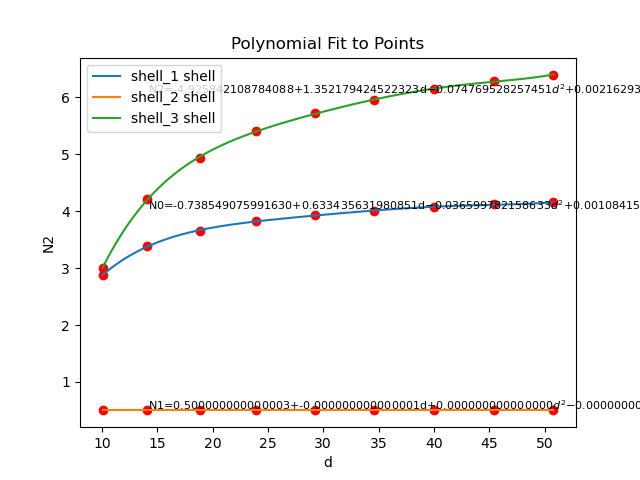

In [25]:
from neighbor_core import fit_polynomial
import matplotlib.pyplot as plt

degree = 5

plt.figure()
for i, shell_i in enumerate(sizes_all.keys()):
    polynomial = fit_polynomial(np.array(sizes_all[shell_i]), 
                                np.array(CNs_all[shell_i]), 
                                degree=degree, new_figure=False, xlabel="d", ylabel=f"N{i}", )

legend_labels = sum([[ '_nolegend', f'{shell_i} shell'] for shell_i in CNs_all.keys()], [])
plt.legend(legend_labels);

# ASE cluster magic numbers

In [26]:
from ase.cluster import Cluster
from ase.cluster import Icosahedron

# Create a simple cluster with 13 atoms
atoms = Icosahedron('Cu', noshells=3)

view = ClusterNeighbor()
view.load_xyz(from_file=False, atom_object=atoms)
view.view_xyz(label=True, show_symbol=True)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# make a example of flat Pt, shrinking it smaller

# Wulff construction examples

In [27]:
from ase.cluster.wulff import wulff_construction
import py3Dmol

# Create a Wulff construction for Cu with specific Miller indices and surface energies
atoms = wulff_construction('Cu', surfaces=[(1, 0, 0), 
                                           (1, 1, 1), 
                                           (1, 1, 0)], 
                           energies=[1.0, 1.0, 1.0], 
                           size=60, 
                           structure='fcc')


view = ClusterNeighbor()
view.load_xyz(from_file=False, atom_object=atoms)
view.view_xyz(label=True, show_symbol=True)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol